(512, 512)
(512, 512)


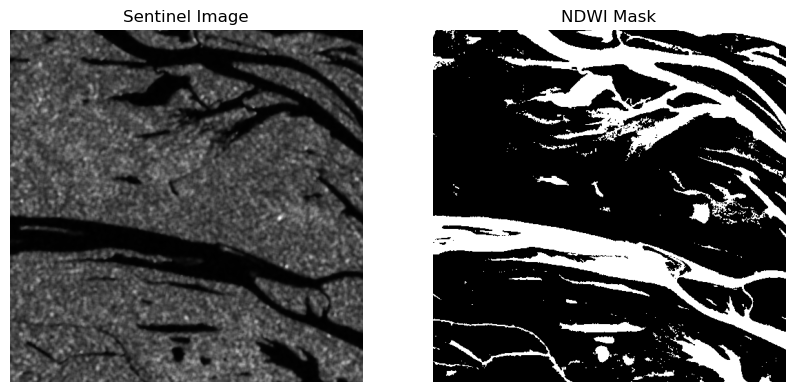

In [10]:
import tifffile as tiff
import matplotlib.pyplot as plt

num = 0

arbitrary_img = tiff.imread(f"./data_new/{num}.tif")
arbitrary_img = arbitrary_img[0]
print(arbitrary_img.shape)
arbitrary_mask = tiff.imread(f"./GEE_Masks/GEE_resized/train_gee/train_0_gee_with_diff_kernels/NDWI_Mask_{num}_resized_corrupt.tif")
print(arbitrary_mask.shape)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(arbitrary_img.squeeze(), cmap='gray')
plt.title('Sentinel Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(arbitrary_mask, cmap='gray')
plt.title('NDWI Mask')
plt.axis('off')

plt.savefig("test.jpg", bbox_inches="tight")
plt.show()

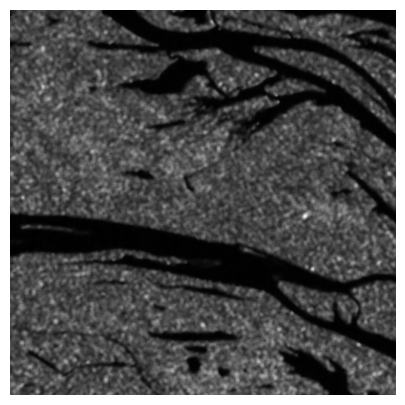

In [11]:
plt.figure(figsize=(7,5))
plt.imshow(arbitrary_img.squeeze(), cmap='gray')
plt.axis('off')
plt.savefig("test1.jpg", bbox_inches="tight")
plt.show()

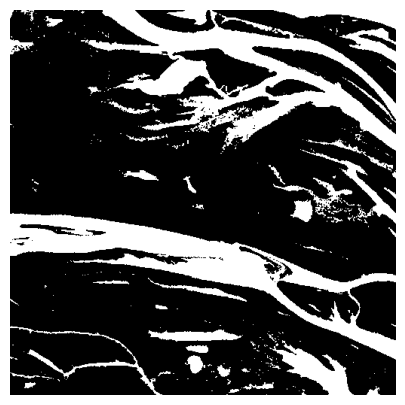

In [12]:
plt.figure(figsize=(7,5))
plt.imshow(arbitrary_mask, cmap='gray')
plt.axis('off')
plt.savefig("test2.jpg", bbox_inches="tight")
plt.show()

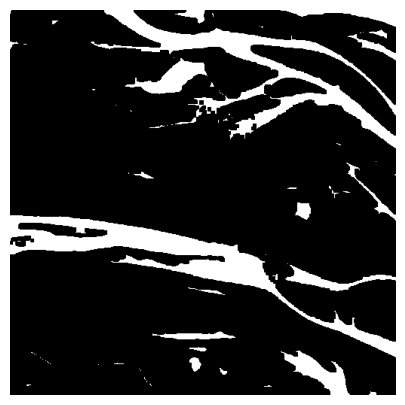

In [13]:
arbitrary_mask = tiff.imread(f"./GEE_Masks/GEE_resized/train_gee/train_15_gee_with_diff_kernels/NDWI_Mask_{num}_resized_corrupt.tif")
plt.figure(figsize=(7,5))
plt.imshow(arbitrary_mask, cmap='gray')
plt.axis('off')
plt.savefig("test3.jpg", bbox_inches="tight")
plt.show()

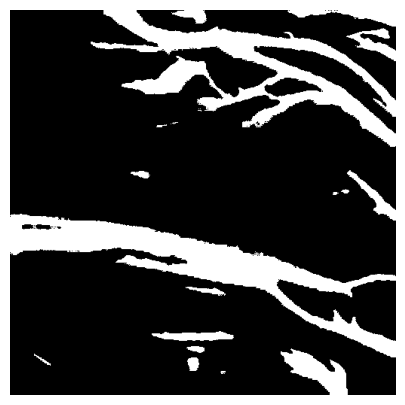

In [14]:
arbitrary_mask = tiff.imread(f"./Training_data_outputs/Masks/New_20_Epoch_15_with_diff_kernels/dense_{num}.tif")
plt.figure(figsize=(7,5))
plt.imshow(arbitrary_mask, cmap='gray')
plt.axis('off')
plt.savefig("test4.jpg", bbox_inches="tight")
plt.show()